# Programming Exercise 2: Logistic Regression with regularization

## Regularized Logistic Regression

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from logisticRegression import *

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
# header=None as the imported data has no header. Otherwise Pandas considers the first row of data as the header
data = pd.read_csv('ex2data2.txt', header=None)

data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
data.describe()
# data.describe - with no () gives results in a different format

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [4]:
# Convert the data into a numpy array
X = data.iloc[:,:-1].to_numpy()

# I am not totally sure why I have to put the [] on [-1]. On this way I have a list of vectors also on y
y = data.iloc[:,[-1]].to_numpy()

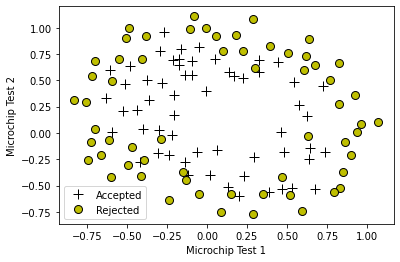

In [5]:
# Plotting the data
acpt  = X[y.flatten() == 1]
rjct = X[y.flatten() == 0]
plt.plot(acpt[:, 0], acpt[:, 1], 'k+', lw=2, ms=10)
plt.plot(rjct[:, 0], rjct[:, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['Accepted', 'Rejected'])

In [6]:
# Note that mapFeature already adds the ones column for us
X = mapFeature(X[:,0], X[:,1], 6)

In [7]:
# Setting regularization parameter lambda=1
lmbd = 1

# m = number of training examples
# n = number of features
(m,n) = X.shape

# Initializa theta as 0s
initial_theta = np.zeros((n, 1))

In [8]:
cost, grad = costFunction(initial_theta, X, y, lmbd)

print('Cost at initial theta (zeros):\n', cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
print(grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros):
 [[0.69314718]]
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[ 0.0085]
 [ 0.0188]
 [ 0.0001]
 [ 0.0503]
 [ 0.0115]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [9]:
test_theta = np.ones((n, 1))
# Setting regularization parameter lambda=10
lmbd = 10
cost, grad = costFunction(test_theta, X, y, lmbd);
print('\nCost at test theta (with lambda = 10):\n', cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
print(grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')


Cost at test theta (with lambda = 10):
 [[ 3.1645]]
Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[[ 0.3460]
 [ 0.1614]
 [ 0.1948]
 [ 0.2269]
 [ 0.0922]]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



## Regularization and Accuracy
### Regularization $\lambda$ = 1

In [27]:
# Setting regularization parameter lambda=1
lmbd = 1


# Initializa theta as 0s
initial_theta = np.zeros((n, 1))

In [28]:
# set options for optimize.minimize
options= {'maxiter': 400}

# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta.flatten(),
                        (X, y.flatten(), lmbd),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Cost at theta found by optimize.minimize: 0.529
theta:
	[1.273, 0.625, 1.181]


#### Prediction's accuracy

In [44]:
p=predict(theta, X)
accuracy = np.mean (p == y.flatten())
print('Train accuracy: {:.1f}'.format(accuracy*100))

print('\nExpected accuracy (with lambda = 1): 83.1 (approx)\n')

Train accuracy: 83.1

Expected accuracy (with lambda = 1): 83.1 (approx)



#### Plotting the decision boundary

In this case we don't have a linear decision boundary. We will plot the decision boundary computing the classifier predictions on an evenly spaced grid and drew the contour point where it changes from y=0 to y=1

In [30]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(mapFeatureForPlotting(u[i],v[j],6), theta)

Text(0.5, 1.0, 'Training data with decision boundary ($\\lambda$=1)')

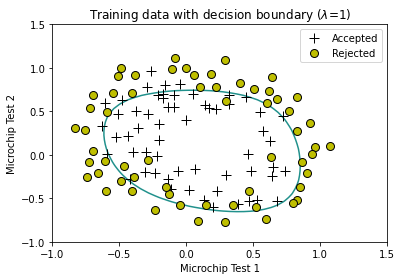

In [40]:
plt.contour(u,v,z,0)
plt.plot(acpt[:, 0], acpt[:, 1], 'k+', lw=2, ms=10)
plt.plot(rjct[:, 0], rjct[:, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['Accepted', 'Rejected'])
plotTitle='Training data with decision boundary ($\lambda$=' + str(lmbd) + ')'
plt.title(plotTitle) 

### Test changes in the regularization parameter $\lambda$ 

In [54]:
# Setting regularization parameter lambda=0
lmbd = int(input('Please enter a regularization value (lambda):'))

Please enter a regularization value (lambda): 100


Cost at theta found by optimize.minimize: 0.686
theta:
	[0.022, -0.017, 0.006]
Train accuracy: 61.0


Text(0.5, 1.0, 'Training data with decision boundary ($\\lambda$=100)')

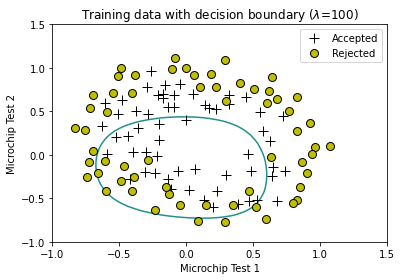

In [55]:


# Initializa theta as 0s
initial_theta = np.zeros((n, 1))

# set options for optimize.minimize
options= {'maxiter': 400}

# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta.flatten(),
                        (X, y.flatten(), lmbd),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

# Accuracy
p=predict(theta, X)
accuracy = np.mean (p == y.flatten())
print('Train accuracy: {:.1f}'.format(accuracy*100))

# Plotting decision boundary with the given lambda
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(mapFeatureForPlotting(u[i],v[j],6), theta)

plt.contour(u,v,z,0)
plt.plot(acpt[:, 0], acpt[:, 1], 'k+', lw=2, ms=10)
plt.plot(rjct[:, 0], rjct[:, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['Accepted', 'Rejected'])
plotTitle='Training data with decision boundary ($\lambda$=' + str(lmbd) + ')'
plt.title(plotTitle)
